In [58]:
%autosave 20
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.vizier import Vizier
from astroquery.simbad import Simbad
from astropy import table

Autosaving every 20 seconds


In [9]:
m67 = Simbad.query_object('M67')
display(m67)
# SkyCoord.guess_from_table(m67['RA', 'DEC'])
center = SkyCoord(ra=m67['RA'], dec=m67['DEC'],
                  unit=(u.hourangle, u.deg))
center

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object
NGC 2682,08 51 18,+11 48.0,4,4,--,--,0,E,,2005ApJ...619..824X


<SkyCoord (ICRS): (ra, dec) in deg
    [(132.825, 11.8)]>

In [19]:
vizier = Vizier(
    column_filters={},
    row_limit=10000
)
twomass_table = vizier.query_region(
    center,
    radius=5*u.arcmin,
    catalog='2MASS'
)[0]
display(twomass_table)
# twomass = SkyCoord.guess_from_table(twomass_table)
twomass = SkyCoord(
    ra=twomass_table['RAJ2000'],
    dec=twomass_table['DEJ2000'],
    unit=(u.deg, u.deg),
)
sdss_table = vizier.query_region(
    center,
    radius=5*u.arcmin,
    catalog='SDSS7'
)[0]
display(sdss_table)
# sdss = SkyCoord.guess_from_table(sdss_table)
sdss = SkyCoord(
    ra=sdss_table['RA_ICRS'],
    dec=sdss_table['DE_ICRS'],
    unit=(u.deg, u.deg),
)

_q,RAJ2000,DEJ2000,_2MASS,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,Qflg,Rflg,Bflg,Cflg,Xflg,Aflg
,deg,deg,,mag,mag,mag,mag,mag,mag,,,,,,
int32,float64,float64,bytes17,float32,float32,float32,float32,float32,float32,bytes3,bytes3,bytes3,bytes3,uint8,uint8
1,132.810285,11.743501,08511446+1144366,13.859,0.036,13.479,0.041,13.334,0.044,AAA,222,222,ccc,0,0
1,132.810279,11.744696,08511446+1144409,14.176,0.028,13.650,0.023,13.598,0.036,AAA,222,222,ccc,0,0
1,132.793054,11.730462,08511033+1143496,16.286,0.104,15.553,0.121,15.463,0.172,ABC,222,111,000,0,0
1,132.806171,11.740373,08511348+1144253,16.506,0.123,16.310,--,15.894,--,BUU,200,100,000,0,0
1,132.786225,11.733243,08510869+1143596,16.539,0.126,16.255,0.229,15.621,--,BDU,220,110,000,0,0
1,132.817854,11.742462,08511628+1144328,12.308,0.021,12.021,0.020,11.954,0.020,AAA,222,111,000,0,0
1,132.839180,11.733575,08512140+1144008,14.821,0.037,14.325,0.049,14.082,0.052,AAA,222,111,cc0,0,0
1,132.840989,11.721581,08512183+1143176,13.274,0.023,13.003,0.023,12.952,0.025,AAA,222,111,000,0,0


_q,mode,cl,SDSS,m_SDSS,zsp,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,RA_ICRS,DE_ICRS,ObsDate,Q
,,,,,,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,deg,deg,yr,
int32,uint8,uint8,bytes19,bytes1,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,uint8
1,2,3,J085116.77+114829.2,,--,20.841,0.431,22.441,0.804,24.681,6.832,24.270,8.114,18.390,0.166,132.819886,11.808115,2006.0844,3
1,1,6,J085116.78+115038.8,,--,14.967,0.006,15.049,0.013,14.243,0.009,13.369,0.009,13.202,0.005,132.819920,11.844135,2005.9314,3
1,2,6,J085116.78+115038.9,,--,15.047,0.006,14.535,0.009,14.196,0.009,15.187,0.011,13.249,0.004,132.819926,11.844151,2006.0161,3
1,1,6,J085116.81+114541.6,,--,15.873,0.005,14.439,0.003,13.921,0.003,13.735,0.003,13.726,0.004,132.820053,11.761561,2005.9314,3
1,1,3,J085116.81+114807.4,,--,17.625,0.074,19.837,0.141,16.103,0.013,14.947,0.016,16.534,0.113,132.820063,11.802067,2005.9314,3
1,2,6,J085116.81+114541.6,*,--,16.432,0.008,14.911,0.005,15.822,0.014,14.156,0.005,14.214,0.007,132.820069,11.761566,2006.0844,3
1,1,6,J085116.85+114938.6,,--,19.266,0.030,16.806,0.004,15.733,0.004,15.367,0.004,15.167,0.005,132.820234,11.827405,2005.9314,3
1,2,6,J085116.85+114938.6,*,--,19.193,0.027,16.791,0.004,15.736,0.003,15.356,0.003,15.152,0.005,132.820239,11.827412,2006.0161,3


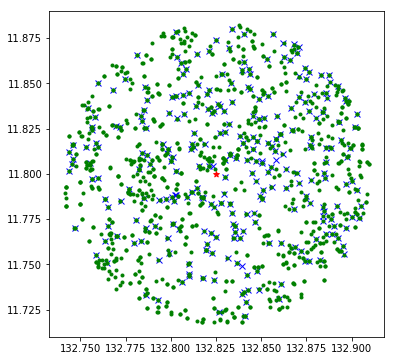

In [36]:
plt.figure(figsize=(6,6))
plt.plot(twomass.ra.to_value(u.deg),
         twomass.dec.to_value(u.deg),
        'x', color='blue')
plt.plot(sdss.ra.to_value(u.deg),
         sdss.dec.to_value(u.deg),
        '.', color='green')
plt.scatter(center.ra.to_value(u.deg),
            center.dec.to_value(u.deg),
            marker='*', color='red')

In [39]:
idx_close_to_center = center.separation(twomass) < 1 * u.arcmin
twomass_table[idx_close_to_center]

_q,RAJ2000,DEJ2000,_2MASS,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,Qflg,Rflg,Bflg,Cflg,Xflg,Aflg
,deg,deg,,mag,mag,mag,mag,mag,mag,,,,,,
int32,float64,float64,bytes17,float32,float32,float32,float32,float32,float32,bytes3,bytes3,bytes3,bytes3,uint8,uint8
1,132.811505,11.789971,08511476+1147238,11.747,0.021,11.495,0.022,11.430,0.018,AAA,222,111,000,0,0
1,132.815406,11.804343,08511569+1148156,13.244,0.024,12.965,0.027,12.955,0.026,AAA,222,111,ddd,0,0
1,132.827869,11.784062,08511868+1147026,11.017,0.021,10.619,0.020,10.529,0.018,AAA,222,111,000,0,0
1,132.829189,11.789187,08511900+1147210,15.819,0.074,15.092,0.089,15.042,0.116,AAB,222,111,sss,0,0
1,132.829927,11.798506,08511918+1147546,12.566,0.021,12.247,0.020,12.182,0.020,AAA,222,111,000,0,0
1,132.821257,11.804460,08511710+1148160,8.140,0.027,7.526,0.018,7.385,0.021,AAA,111,111,000,0,0
1,132.830069,11.807475,08511921+1148269,15.151,0.042,14.600,0.054,14.312,0.060,AAA,222,111,000,0,0
1,132.823341,11.804540,08511760+1148163,14.616,0.023,11.767,--,11.455,--,AUU,200,100,c00,0,0


In [43]:
idx_twomass, idx_sdss, d2d, d3d = sdss.search_around_sky(
    twomass, 2*u.arcsec
)
twomass_table[idx_twomass]

_q,RAJ2000,DEJ2000,_2MASS,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,Qflg,Rflg,Bflg,Cflg,Xflg,Aflg
,deg,deg,,mag,mag,mag,mag,mag,mag,,,,,,
int32,float64,float64,bytes17,float32,float32,float32,float32,float32,float32,bytes3,bytes3,bytes3,bytes3,uint8,uint8
1,132.810285,11.743501,08511446+1144366,13.859,0.036,13.479,0.041,13.334,0.044,AAA,222,222,ccc,0,0
1,132.810285,11.743501,08511446+1144366,13.859,0.036,13.479,0.041,13.334,0.044,AAA,222,222,ccc,0,0
1,132.810279,11.744696,08511446+1144409,14.176,0.028,13.650,0.023,13.598,0.036,AAA,222,222,ccc,0,0
1,132.810279,11.744696,08511446+1144409,14.176,0.028,13.650,0.023,13.598,0.036,AAA,222,222,ccc,0,0
1,132.793054,11.730462,08511033+1143496,16.286,0.104,15.553,0.121,15.463,0.172,ABC,222,111,000,0,0
1,132.793054,11.730462,08511033+1143496,16.286,0.104,15.553,0.121,15.463,0.172,ABC,222,111,000,0,0
1,132.806171,11.740373,08511348+1144253,16.506,0.123,16.310,--,15.894,--,BUU,200,100,000,0,0
1,132.806171,11.740373,08511348+1144253,16.506,0.123,16.310,--,15.894,--,BUU,200,100,000,0,0


In [59]:
idx_sdss, d2d, d3d = twomass.match_to_catalog_sky(sdss)
t = table.hstack((twomass_table, sdss_table[idx_sdss]))
t['sep'] = d2d
t

/opt/conda/lib/python3.6/site-packages/astropy/utils/metadata.py:360: MergeConflictWarning: Cannot merge meta key 'ID' types <class 'str'> and <class 'str'>, choosing ID='II_294_sdss7'
  MergeConflictWarning)
/opt/conda/lib/python3.6/site-packages/astropy/utils/metadata.py:360: MergeConflictWarning: Cannot merge meta key 'name' types <class 'str'> and <class 'str'>, choosing name='II/294/sdss7'
  MergeConflictWarning)
/opt/conda/lib/python3.6/site-packages/astropy/utils/metadata.py:360: MergeConflictWarning: Cannot merge meta key 'description' types <class 'str'> and <class 'str'>, choosing description='* output of the SDSS photometric catalog'
  MergeConflictWarning)


_q_1,RAJ2000,DEJ2000,_2MASS,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,Qflg,Rflg,Bflg,Cflg,Xflg,Aflg,_q_2,mode,cl,SDSS,m_SDSS,zsp,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,RA_ICRS,DE_ICRS,ObsDate,Q,sep
,deg,deg,,mag,mag,mag,mag,mag,mag,,,,,,,,,,,,,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,deg,deg,yr,,deg
int32,float64,float64,bytes17,float32,float32,float32,float32,float32,float32,bytes3,bytes3,bytes3,bytes3,uint8,uint8,int32,uint8,uint8,bytes19,bytes1,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,uint8,float64
1,132.810285,11.743501,08511446+1144366,13.859,0.036,13.479,0.041,13.334,0.044,AAA,222,222,ccc,0,0,1,1,6,J085114.46+114436.5,,--,17.255,0.009,15.653,0.004,15.071,0.003,14.892,0.004,14.784,0.005,132.810253,11.743496,2006.0844,3,3.17266619626919e-05
1,132.810279,11.744696,08511446+1144409,14.176,0.028,13.650,0.023,13.598,0.036,AAA,222,222,ccc,0,0,1,1,6,J085114.45+114440.9,,--,17.981,0.013,16.210,0.004,15.399,0.003,15.203,0.004,15.341,0.005,132.810246,11.744697,2006.0844,3,3.232459429986805e-05
1,132.793054,11.730462,08511033+1143496,16.286,0.104,15.553,0.121,15.463,0.172,ABC,222,111,000,0,0,1,1,6,J085110.32+114349.5,,--,22.852,0.280,20.067,0.017,18.661,0.009,18.001,0.008,17.614,0.014,132.793028,11.730441,2006.0844,3,3.300088183610788e-05
1,132.806171,11.740373,08511348+1144253,16.506,0.123,16.310,--,15.894,--,BUU,200,100,000,0,0,1,2,6,J085113.48+114425.6,*,--,25.300,1.040,21.810,0.071,20.392,0.030,18.975,0.013,18.226,0.025,132.806196,11.740456,2005.9314,3,8.65339410341914e-05
1,132.786225,11.733243,08510869+1143596,16.539,0.126,16.255,0.229,15.621,--,BDU,220,110,000,0,0,1,1,6,J085108.61+114359.3,,--,20.928,0.065,19.075,0.010,18.351,0.008,18.136,0.009,18.019,0.017,132.785914,11.733164,2006.0844,3,0.00031458271139627445
1,132.817854,11.742462,08511628+1144328,12.308,0.021,12.021,0.020,11.954,0.020,AAA,222,111,000,0,0,1,1,6,J085116.28+114432.8,,--,16.157,0.011,16.007,0.019,15.607,0.012,15.057,0.018,14.451,0.012,132.817833,11.742445,2006.0844,3,2.6678360157593366e-05
1,132.839180,11.733575,08512140+1144008,14.821,0.037,14.325,0.049,14.082,0.052,AAA,222,111,cc0,0,0,1,1,6,J085121.39+114400.8,,--,20.172,0.040,17.701,0.006,16.579,0.004,16.210,0.005,15.980,0.007,132.839139,11.733563,2006.0844,3,4.189846167827402e-05
1,132.840989,11.721581,08512183+1143176,13.274,0.023,13.003,0.023,12.952,0.025,AAA,222,111,000,0,0,1,1,6,J085121.83+114317.6,,--,16.307,0.007,15.082,0.005,15.596,0.012,14.390,0.005,14.292,0.006,132.840975,11.721581,2006.0844,3,1.3708049052631302e-05
